# Sentiment Analysis

## Sentiment of transcript

In [21]:
# reading corpus
import pandas as pd

data = pd.read_pickle('corpus_ted.pkl')
data

,transcript,full_name
andrew,"""I felt a Funeral, in my Brain, and Mourners ...",Andrew Solomon
brene,"So, I'll start with this: a couple years ago,...",Brene Brown
cameron,"Hi. My name is Cameron Russell, and for the l...",Cameron Russell
celeste,"All right, I want to see a show of hands: how...",Celeste Headlee
maze,"Hello, Doha. Hello! Salaam alaikum. I love ...",Maze Jobrani
robert,What keeps us healthy and happy as we go thro...,Robert Waldinger
shaw,When I was seven years old and my sister was ...,Shawn Achor
simon,How do you explain when things don't go as we...,Simon Sinek
thomas,I've always had a fascination for computers a...,Thomas Suarez
tom,"My name is Tom, and I've come here today to c...",Tom Thum


In [22]:
#finding polarity and subjectivity 
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
andrew,"""I felt a Funeral, in my Brain, and Mourners ...",Andrew Solomon,0.046418,0.486613
brene,"So, I'll start with this: a couple years ago,...",Brene Brown,0.086774,0.535024
cameron,"Hi. My name is Cameron Russell, and for the l...",Cameron Russell,0.110200,0.554340
celeste,"All right, I want to see a show of hands: how...",Celeste Headlee,0.141015,0.509899
maze,"Hello, Doha. Hello! Salaam alaikum. I love ...",Maze Jobrani,0.042093,0.383476
robert,What keeps us healthy and happy as we go thro...,Robert Waldinger,0.177199,0.475480
shaw,When I was seven years old and my sister was ...,Shawn Achor,0.174594,0.440512
simon,How do you explain when things don't go as we...,Simon Sinek,0.189045,0.487851
thomas,I've always had a fascination for computers a...,Thomas Suarez,0.114257,0.491433
tom,"My name is Tom, and I've come here today to c...",Tom Thum,0.229349,0.476034


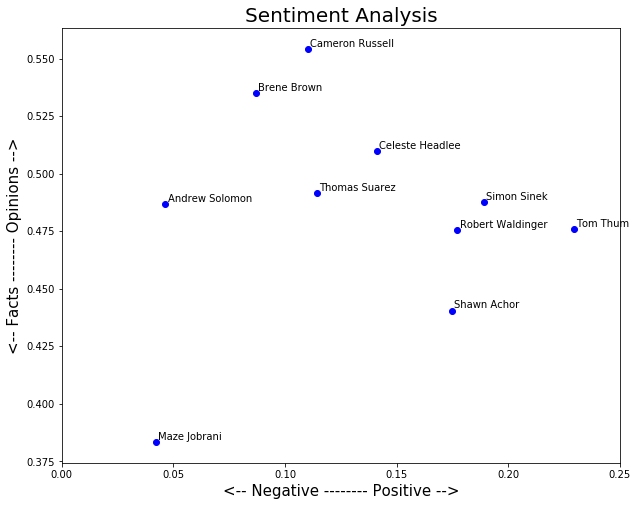

In [23]:
# plot results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, speaker in enumerate(data.index):
    x = data.polarity.loc[speaker]
    y = data.subjectivity.loc[speaker]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(.0, .25) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of talk Over Time

In [24]:
# Split in 10 parts
import numpy as np
import math

def split_text(text, n=10):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size) #start,stop,interval
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
data

,transcript,full_name,polarity,subjectivity
andrew,"""I felt a Funeral, in my Brain, and Mourners ...",Andrew Solomon,0.046418,0.486613
brene,"So, I'll start with this: a couple years ago,...",Brene Brown,0.086774,0.535024
cameron,"Hi. My name is Cameron Russell, and for the l...",Cameron Russell,0.110200,0.554340
celeste,"All right, I want to see a show of hands: how...",Celeste Headlee,0.141015,0.509899
maze,"Hello, Doha. Hello! Salaam alaikum. I love ...",Maze Jobrani,0.042093,0.383476
robert,What keeps us healthy and happy as we go thro...,Robert Waldinger,0.177199,0.475480
shaw,When I was seven years old and my sister was ...,Shawn Achor,0.174594,0.440512
simon,How do you explain when things don't go as we...,Simon Sinek,0.189045,0.487851
thomas,I've always had a fascination for computers a...,Thomas Suarez,0.114257,0.491433
tom,"My name is Tom, and I've come here today to c...",Tom Thum,0.229349,0.476034


In [26]:
# list to hold pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' "I felt a Funeral, in my Brain, and Mourners to and fro kept treading — treading — till [it seemed] that Sense was breaking through — And when they all were seated, a Service, like a Drum — kept beating — beating — till I [thought] my Mind was going numb — And then I heard them lift a Box and creak across my Soul with those same Boots of Lead, again, then Space — began to toll, As [all] the Heavens were a Bell, and Being, [but] an Ear, and I, and Silence, some strange Race, wrecked, solitary, here — [And] then a Plank in Reason, broke, and I fell down and down — and hit a World, at every plunge, and Finished knowing — then —"   We know depression through metaphors. Emily Dickinson was able to convey it in language, Goya in an image. Half the purpose of art is to describe such iconic states.   As for me, I had always thought myself tough, one of the people who could survive if I\'d been sent to a concentration camp.   In 1991, I had a series of losses. My mother died, a relationship

In [27]:
len(list_pieces)

10

In [28]:
len(list_pieces[0])

10

In [29]:
# polarity for each piece

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.004411764705882358,
  -0.0533323620823621,
  -0.04804421768707482,
  0.08220380496696286,
  0.14267006802721088,
  0.053775510204081646,
  0.03404264654264655,
  -0.034392393320964734,
  0.06583646616541354,
  0.21412004662004655],
 [-0.04172979797979797,
  0.15711805555555552,
  0.14375000000000002,
  0.24067460317460318,
  0.10737179487179488,
  0.11964531680440772,
  0.2190013979076479,
  -0.1522778808493094,
  0.00500321750321754,
  0.11666666666666668],
 [0.06114417989417989,
  -0.012916666666666665,
  0.085,
  0.15956959706959706,
  0.21708683473389354,
  0.005882352941176476,
  0.1636363636363636,
  0.06588383838383839,
  0.1322222222222223,
  0.2758241758241758],
 [0.17377570346320345,
  0.14083008658008658,
  0.2661764705882353,
  0.19854497354497352,
  -0.10648148148148147,
  0.01499999999999999,
  0.20606060606060603,
  -0.006249999999999999,
  0.22205882352941175,
  0.2075396825396826],
 [0.13775510204081634,
  -0.15,
  -0.1633333333333333,
  0.034523809523809526,
  0.0

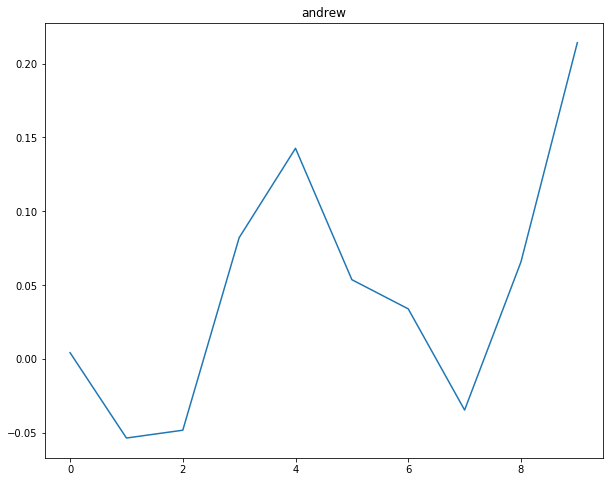

In [30]:
# plot for one
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

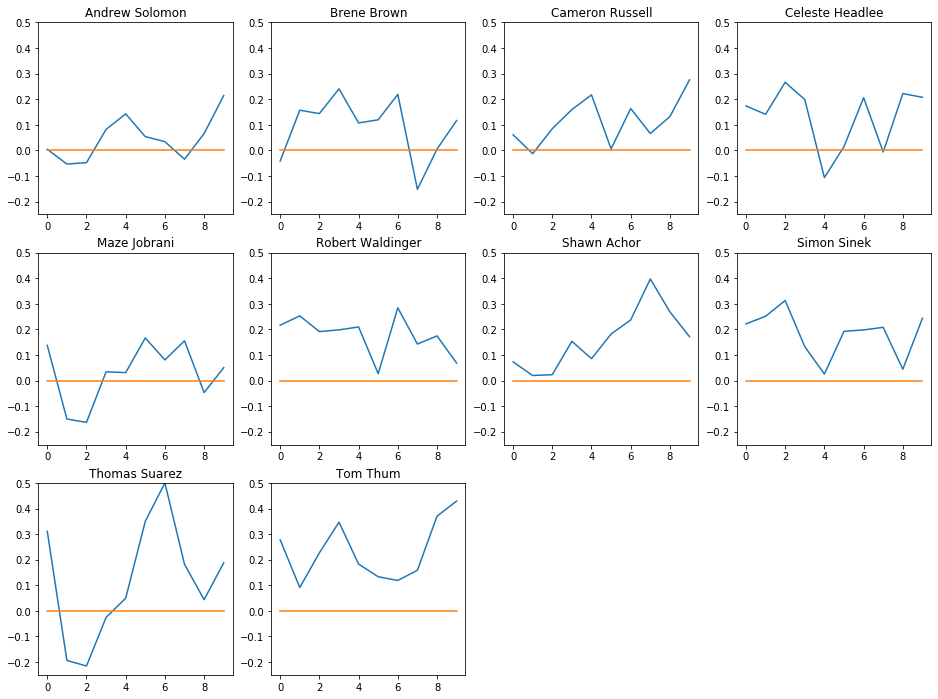

In [31]:
# plot for all 
plt.rcParams['figure.figsize'] = [16, 12]

for index, speaker in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.25, ymax=.5)
    
plt.show()